# Bài tập tuần 5 - Fuzzy Logic

### Nguyễn Tấn Phát_20146511

In [61]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

50.00000000000001


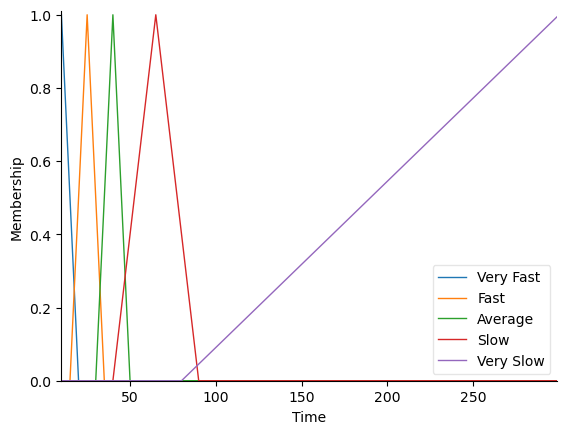

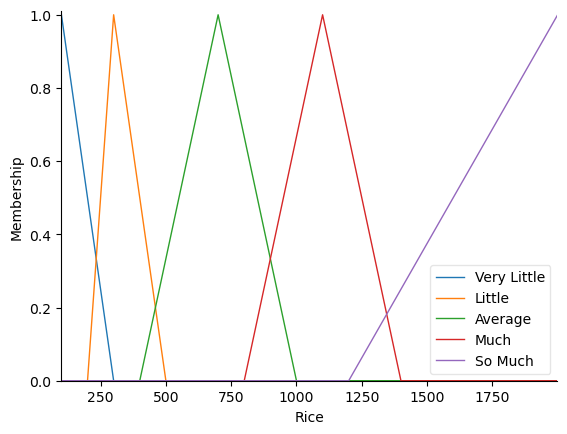

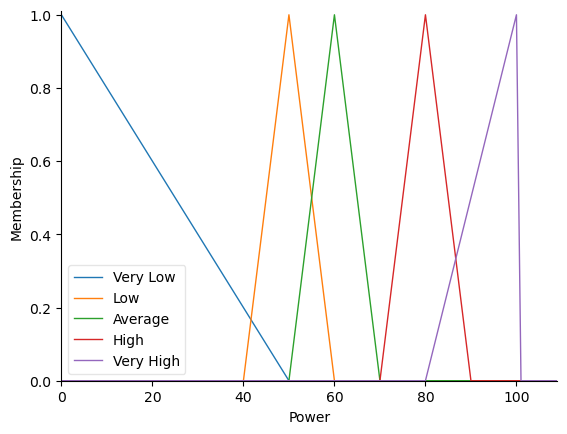

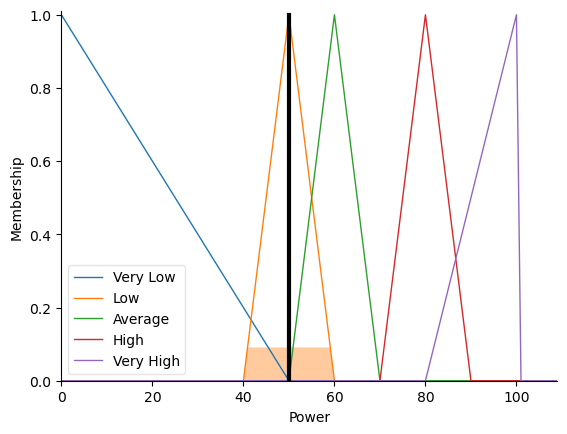

In [65]:
Time = ctrl.Antecedent(np.arange(10,300),'Time')
Rice = ctrl.Antecedent(np.arange(100,2000),'Rice')
Power = ctrl.Consequent(np.arange(0,110),'Power')
Time['Very Fast']= fuzz.trimf(Time.universe,[10,10,20])
Time['Fast']= fuzz.trimf(Time.universe,[15,25,35])
Time['Average']= fuzz.trimf(Time.universe,[30,40,50])
Time['Slow']= fuzz.trimf(Time.universe,[40,65,90])
Time['Very Slow']= fuzz.trimf(Time.universe,[80,300,300])
Time.view()
Rice['Very Little']= fuzz.trimf(Rice.universe,[100,100,300])
Rice['Little']= fuzz.trimf(Rice.universe,[200,300,500])
Rice['Average']= fuzz.trimf(Rice.universe,[400,700,1000])
Rice['Much']= fuzz.trimf(Rice.universe,[800,1100,1400])
Rice['So Much']= fuzz.trimf(Rice.universe,[1200,2000,2000])
Rice.view()
Power['Very Low']= fuzz.trimf(Power.universe,[0,0,50])
Power['Low']= fuzz.trimf(Power.universe,[40,50,60])
Power['Average']= fuzz.trimf(Power.universe,[50,60,70])
Power['High']= fuzz.trimf(Power.universe,[70,80,90])
Power['Very High']= fuzz.trimf(Power.universe,[80,100,100])
Power.view()
rule1 = ctrl.Rule(Time['Very Slow']&Rice['Very Little'],Power['Very Low'])
rule2 = ctrl.Rule(Time['Slow']&Rice['Very Little'],Power['Very Low'])
rule3 = ctrl.Rule(Time['Average']&Rice['Very Little'],Power['Low'])
rule4 = ctrl.Rule(Time['Fast']&Rice['Very Little'],Power['Average'])
rule5 = ctrl.Rule(Time['Very Fast']&Rice['Very Little'],Power['Low'])

rule6 = ctrl.Rule(Time['Very Slow']&Rice['Little'],Power['Very Low'])
rule7 = ctrl.Rule(Time['Slow']&Rice['Little'],Power['Low'])
rule8 = ctrl.Rule(Time['Average']&Rice['Little'],Power['Low'])
rule9 = ctrl.Rule(Time['Fast']&Rice['Little'],Power['Low'])
rule10 = ctrl.Rule(Time['Very Fast']&Rice['Little'],Power['High'])

rule11 = ctrl.Rule(Time['Very Slow']&Rice['Average'],Power['Average'])
rule12 = ctrl.Rule(Time['Slow']&Rice['Average'],Power['Low'])
rule13 = ctrl.Rule(Time['Average']&Rice['Average'],Power['Average'])
rule14 = ctrl.Rule(Time['Fast']&Rice['Average'],Power['High'])
rule15 = ctrl.Rule(Time['Very Fast']&Rice['Average'],Power['High'])

rule16 = ctrl.Rule(Time['Very Slow']&Rice['Much'],Power['Low'])
rule17 = ctrl.Rule(Time['Slow']&Rice['Much'],Power['Average'])
rule18 = ctrl.Rule(Time['Average']&Rice['Much'],Power['Average'])
rule19 = ctrl.Rule(Time['Fast']&Rice['Much'],Power['High'])
rule20 = ctrl.Rule(Time['Very Fast']&Rice['Much'],Power['Very High'])

rule21 = ctrl.Rule(Time['Very Slow']&Rice['So Much'],Power['Average'])
rule22 = ctrl.Rule(Time['Slow']&Rice['So Much'],Power['Average'])
rule23 = ctrl.Rule(Time['Average']&Rice['So Much'],Power['High'])
rule24 = ctrl.Rule(Time['Fast']&Rice['So Much'],Power['Very High'])
rule25 = ctrl.Rule(Time['Very Fast']&Rice['So Much'],Power['Very High'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])

powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Time'] = 100     #giá trị đọc từ cảm biến
powering.input['Rice'] = 1000 #giá trị đọc từ cảm biến

powering.compute()
#xuất ra màn hình
print(powering.output['Power'])
Power.view(sim = powering)
